# Check your feature extraction code

using package [python_speech_features](https://github.com/jameslyons/python_speech_features)

```bash
# you can install the package
pip install python_speech_features
pip install librosa
```

# import package

In [1]:
# for preview the audio
import IPython.display as ipd
# feature package
from python_speech_features import fbank, mfcc, logfbank
import librosa
import numpy
import scipy
# plot package
import matplotlib.pyplot as plt
import matplotlib as mpl

# show the demo audio

In [2]:
ipd.Audio("./recorded_trim.wav")

# load audio by librosa

the loaded audio has been normalized (both divide (2 << 15) ),
which type is float32


In [3]:
audio, sr = librosa.load("./recorded_trim.wav",sr=16000)
audio

array([-3.0517578e-05,  0.0000000e+00,  0.0000000e+00, ...,
        3.9672852e-04,  3.9672852e-04,  3.9672852e-04], dtype=float32)

# the raw audio

The raw audio and the normalized audio both can be used for feature extraction (perfer normalized audio)

In [4]:
raw_audio = audio * ( 2 << 15 )
# audio = raw_audio
raw_audio


array([-2.,  0.,  0., ..., 26., 26., 26.])

# the function for visualization

In [5]:

def plot_show(filter_banks_T, feat_name):
    # 画图
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
    cax = ax.matshow(
        filter_banks_T.astype("float32"),
        interpolation="nearest",
        aspect="auto",
        cmap=plt.cm.jet,
        origin="lower",
    )
    fig.colorbar(cax)
    plt.title(feat_name)
    plt.show()

# fbank40 feature using package
you should check your result with the fbank_feats generated by package

maybe you can check the [fbank function](https://github.com/jameslyons/python_speech_features/blob/e280ac2b5797a3445c34820b0110885cd6609e5f/python_speech_features/base.py) details step by step


(299, 40)


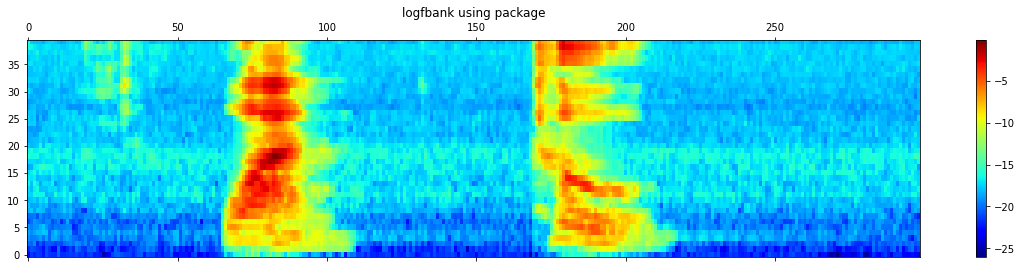

In [6]:
fbank_feats,energy = fbank(audio,
                    samplerate=16000,
                    winlen=0.025,
                    winstep=0.01,
                    nfilt=40,
                    nfft=512,
                    lowfreq=0,
                    highfreq=None,
                    preemph=0.97,
                    winfunc=numpy.hamming
                )
py_logfbank = numpy.log(fbank_feats)
print(py_logfbank.shape)
plot_show(py_logfbank.T, "logfbank using package")

# the follow code use the numpy.ones for winfunc, not numpy.hamming
# py_logfbank = logfbank(audio,samplerate=16000,winlen=0.025,winstep=0.01,nfilt=40,nfft=512,lowfreq=0,highfreq=None,preemph=0.97,
#                     )
# plot_show(py_logfbank.T)

# mfcc13 using package

(299, 13)


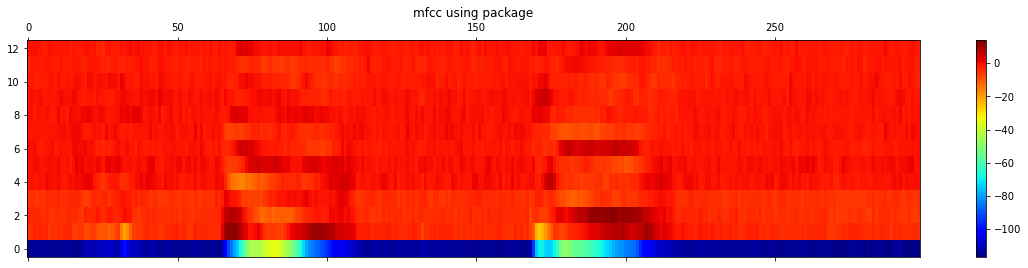

[[-1.14173001e+02 -5.06028752e+00 -3.30500410e+00 ... -1.39269230e+00
  -2.98483973e+00 -4.68374808e-01]
 [-1.14714201e+02 -4.20923952e+00 -3.02108458e+00 ... -1.01416907e+00
  -1.36867798e+00 -2.09467841e-01]
 [-1.13254622e+02 -3.15734244e+00 -3.67043184e+00 ... -1.76542030e+00
  -1.70669208e+00  7.32325390e-02]
 ...
 [-1.15016884e+02 -3.77944225e+00 -5.83531632e+00 ... -7.74818612e-01
  -1.28605599e-01 -3.05898412e-01]
 [-1.15151504e+02 -3.33127252e+00 -6.05299500e+00 ... -1.84184675e+00
  -1.63984258e+00 -8.22591285e-01]
 [-1.15639483e+02 -4.86753670e+00 -5.29955065e+00 ... -2.82703134e+00
  -2.36899465e+00 -1.43986803e+00]]


In [7]:
py_mfcc = mfcc(audio,
               samplerate=16000,
               winlen=0.025,
               winstep=0.01,
               numcep=13,
               nfilt=40,
               nfft=512,
               lowfreq=0,
               highfreq=None,
               preemph=0.97,
               ceplifter=0,
               appendEnergy=False,
               winfunc=numpy.hamming)
print(py_mfcc.shape)
plot_show(py_mfcc.T, "mfcc using package")
print(py_mfcc)

# show the idct result for mfcc using package
There are some differences, but they are generally close

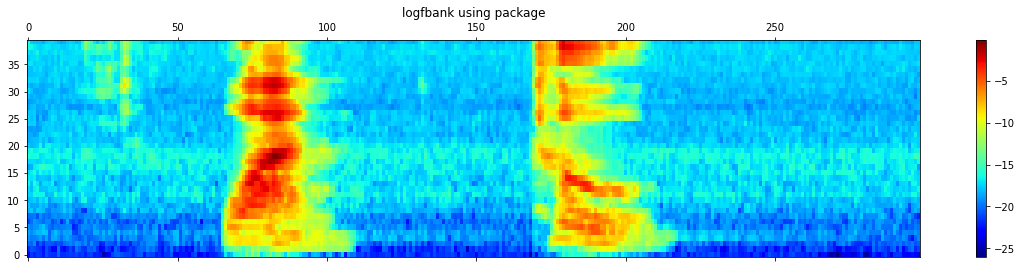

(40, 299)


(299, 64)
(40, 299)


In [8]:
plot_show(py_logfbank.T, "logfbank using package")


logmel = scipy.fftpack.idct(py_mfcc.T, axis=0, type=2, norm='ortho', n=40)
print(logmel.shape)
plot_show(logmel, "idct no zero padding")

pad_py_mfcc = numpy.pad(py_mfcc,((0,0),(0,64-13)),'constant', constant_values=0) 
print(pad_py_mfcc.shape)
pad_logmel = scipy.fftpack.idct(pad_py_mfcc.T, axis=0, type=2, norm='ortho', n=40)
print(pad_logmel.shape)
plot_show(pad_logmel, "idct zero padding 64")

# mfcc from fbank using package


(40, 299)


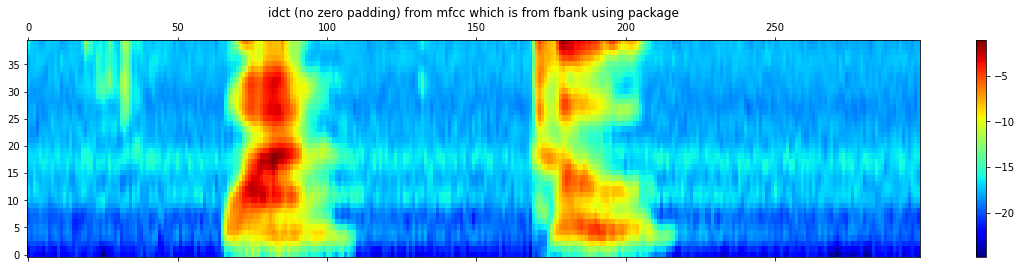

In [9]:
# py_logfbank is from the cell named "fbank40 feature using package"
py_mfcc_from_fbank = scipy.fftpack.dct(py_logfbank, type=2, axis=1, norm='ortho')[:,:13]
plot_show(py_mfcc_from_fbank.T, "mfcc from fbank using package")
feat_logmel = scipy.fftpack.idct(py_mfcc_from_fbank.T, axis=0, type=2, norm='ortho', n=40)
print(feat_logmel.shape)
plot_show(feat_logmel, r"idct (no zero padding) from mfcc which is from fbank using package")